In [1]:
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Data Augmentation for SSD
1. Image Distortions
    - Random Brightness
    - Random Constrast
    - Random Hue
    - Random Saturation
    - Random Reorder Channels

In [15]:
#### Helper Functions
def show_img(im, figsize=None, ax=None):
    if not ax: fig, ax = plt.subplots(figsize=figsize)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

### Random Brightness

In [7]:
filename = 'images/test.jpg'
image = cv2.imread(filename)
image.shape, image.dtype

((160, 160, 3), dtype('uint8'))

In [13]:
def brightness(image, delta):
    data = image.astype(np.float32)
    delta = random.randint(-delta, delta)
    data += delta
    data[data > 255] = 255
    data[data < 0] = 0
    data = data.astype(np.uint8)
    return data

def random_brightness(image, delta=0, prob=1):
    p = random.uniform(0, 1)
    if p < prob:
        return brightness(image, delta)
    return image

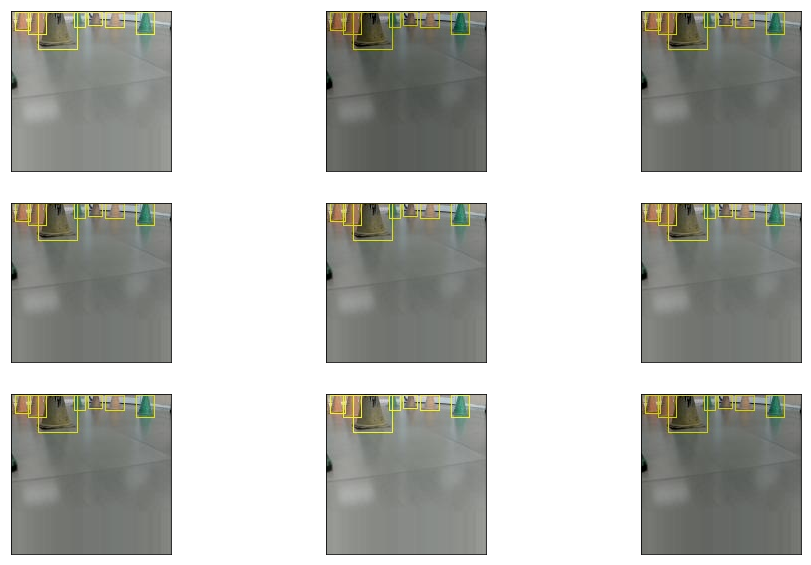

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(16, 10))
for i, ax in enumerate(axes.flat):
    tf_image = random_brightness(image, delta=32, prob=0.5)
    show_img(tf_image, ax=ax)
plt.show()

### Random Constrast

In [24]:
def constrast(image, lower, upper):
    data = image.astype(np.float32)
    delta = random.uniform(lower, upper)
    data *= delta
    data[data > 255] = 255
    data[data < 0] = 0
    data = data.astype(np.uint8)
    return data

def random_constrast(image, lower=0, upper=0, prob=1):
    p = random.uniform(0, 1)
    if p < prob:
        return constrast(image, lower, upper)
    return image

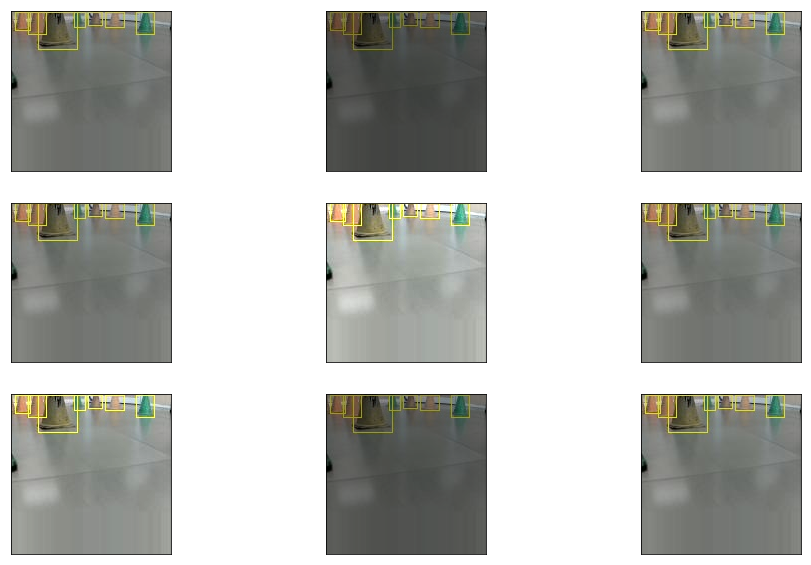

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(16, 10))
for i, ax in enumerate(axes.flat):
    tf_image = random_constrast(image, lower=0.5, upper=1.5, prob=0.5)
    show_img(tf_image, ax=ax)
plt.show()